# Chapter 6 | Decision Trees

## Training and visualizing Decision trees

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "chap6"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [3]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

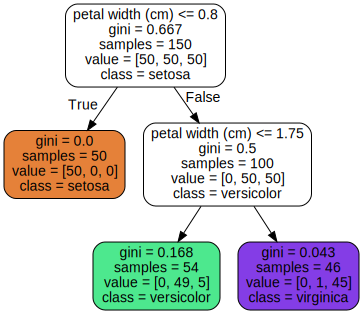

In [10]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
))

SVG(graph.pipe(format='svg'))

## Making Predictions

### Calculate the Gini impurity score

$$ G_i = 1 - \sum_{n=1}^{k} {P_{i,k}}^2$$

Where $P_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node.

## Estimating Class Probabilities

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])

## Regression

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [11]:
graph = Source(export_graphviz(
    tree_reg,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
))

SVG(graph.pipe(format='svg'))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

## Exercises

1. What is the approximate depth of a Decision Tree trained (without restrictions)
on a training set with 1 million instances?  
    $O(log_2(1 000 000)) \approx  19.9 $
3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing
max_depth?  
    Yes.
4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling
the input features?  
    false.
5. If it takes one hour to train a Decision Tree on a training set containing 1 million
instances, roughly how much time will it take to train another Decision Tree on a
training set containing 10 million instances?  
    ~~10 hours~~ $K = (n \times 10m \times log(10m))/ (n \times m \times log(m)) | m = 10^6 = 11.7 hours$
6. If your training set contains 100,000 instances, will setting presort=True speed
up training?  
    ~~Yes~~ Works only if the dataset contains less than a few thousand instances.